In [327]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [328]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [329]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [383]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

In [331]:
from pandas.tools.plotting import andrews_curves, parallel_coordinates

In [332]:
#load
train = pd.read_csv('data/pml_train.csv', index_col='id')
#cat2int
le = preprocessing.LabelEncoder()
for column in train.columns[:116]:
    train[column] = le.fit_transform(train[column])
    
train.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,1,0,0,0,0,0,...,0.669748,0.515940,0.55421,0.53774,0.47225,0.492200,0.481306,0.756454,0.344502,2152.80
1,1,0,0,0,0,1,0,0,0,0,...,0.484775,0.698278,0.35533,0.40657,0.40666,0.468839,0.458493,0.304350,0.470455,1019.89
2,0,0,0,1,0,0,0,0,0,0,...,0.350956,0.363768,0.58354,0.44352,0.39599,0.341813,0.352251,0.339244,0.283969,4477.83
3,1,0,0,0,0,1,0,0,0,0,...,0.748243,0.538694,0.54829,0.50420,0.51111,0.711942,0.698722,0.709578,0.776114,907.11
4,0,1,0,0,0,0,0,0,1,0,...,0.321058,0.326430,0.31280,0.39648,0.38016,0.245410,0.241676,0.261150,0.342082,974.62


In [334]:
#normalize and get X,y
X = preprocessing.scale(train.iloc[:,:-1])
y = train.iloc[:,-1]

In [ ]:
>>> X = [[0, 0], [2, 2]]
>>> y = [0.5, 2.5]
>>> clf = svm.SVR()
>>> clf.fit(X, y) 
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
>>> clf.predict([[1, 1]])
array([ 1.5])

In [401]:
#
svr = svm.SVR(cache_size=1000)

In [388]:
#
rfr = RandomForestRegressor(n_estimators=1,
                            criterion='mse',
                            oob_score=False,
                            max_features='auto',
                            n_jobs=-1,
                            min_impurity_decrease=0,
                            warm_start=False)

In [372]:
X1 = np.delete(X,[14, 21, 34, 59, 61, 63, 68, 69],axis=1)

In [374]:
X1.shape

(131822, 122)

In [369]:
np.where(im<1e-4)

(array([14, 21, 34, 59, 61, 63, 68, 69]),)

In [357]:
im = rfr.feature_importances_

In [389]:
cv = cross_validate(rfr,X1,y,scoring='neg_mean_absolute_error',return_train_score=False,n_jobs=-1)
cv['test_score']

array([-1796.33807515, -1788.22721558, -1808.3641436 ])

In [378]:
#one hot encoding
enc = preprocessing.OneHotEncoder()
sm = enc.fit_transform(train.iloc[:,:116])
np.c_[sm.toarray(), train.iloc[:,116:-1]]

In [382]:
cv = cross_validate(rfr,np.c_[sm.toarray(), train.iloc[:,116:-1]],y,scoring='neg_mean_absolute_error',return_train_score=False,n_jobs=-1)
cv['test_score']

array([-1759.98863795, -1747.07776655, -1759.28878289])

In [314]:
a.append(list(df['cat3']))
np.array(a).T

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [315]:
multicats = []
bincats = []
for column in df.columns:
    if len(df[column].unique()) > 2:
        multicats.append(list(df[column]))
    else:
        bincats.append(list(df[column]))
multicats = np.array(multicats).T
bincats = np.array(bincats).T
tar = np.c_[bincats, enc.fit_transform(multicats).toarray()]
tar

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.]])

In [319]:
bincats.shape

(131822, 73)

In [320]:
mc = enc.fit_transform(multicats)

In [322]:
mc

<131822x13628 sparse matrix of type '<class 'numpy.float64'>'
	with 7645676 stored elements in Compressed Sparse Row format>

In [14]:
df1 = df.sample(n=df.shape[0]//100)

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


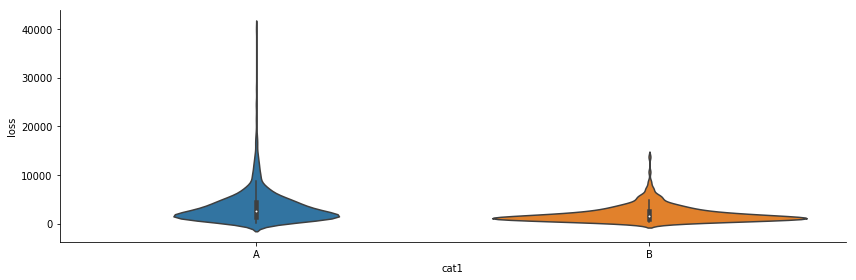

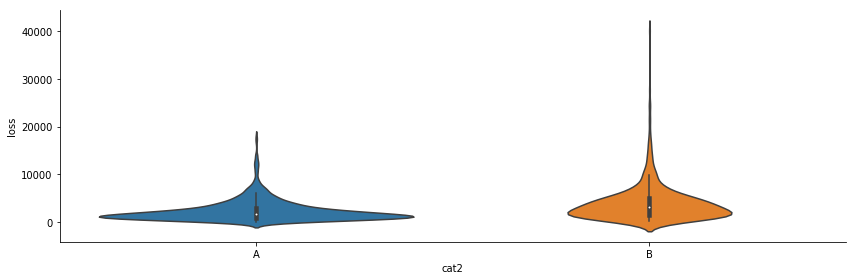

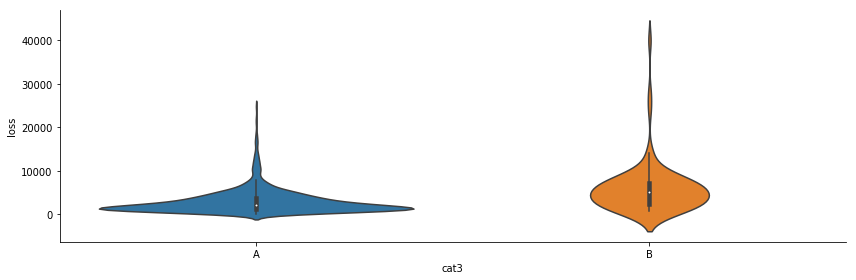

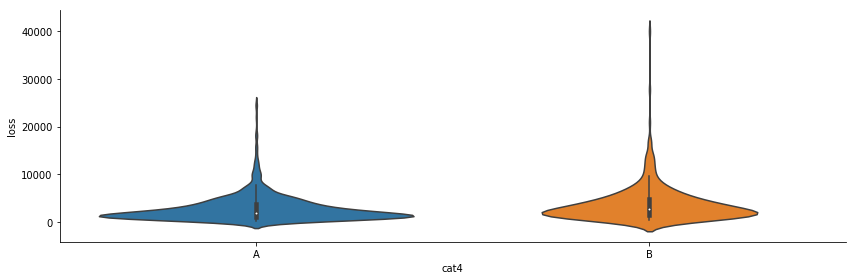

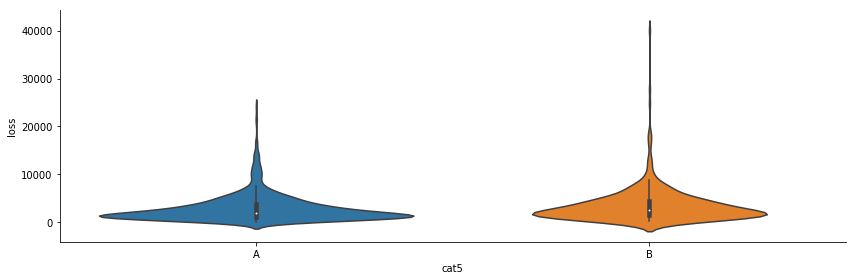

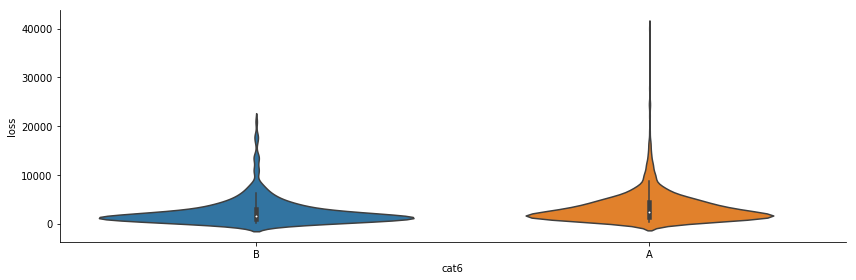

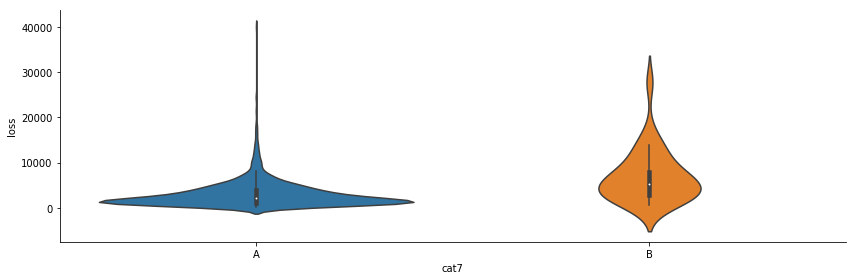

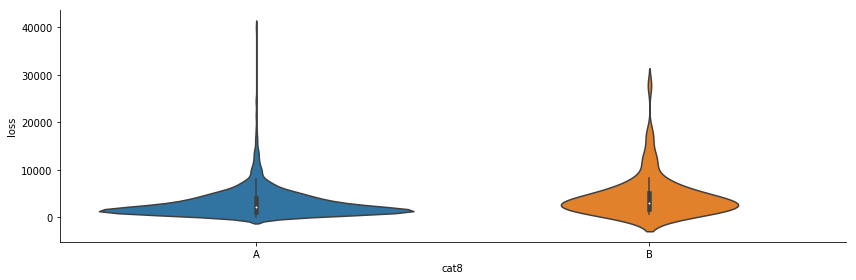

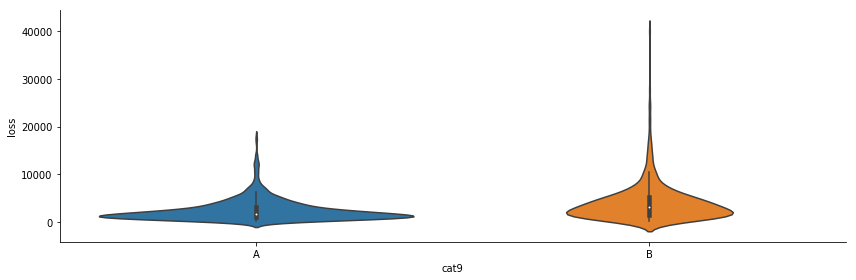

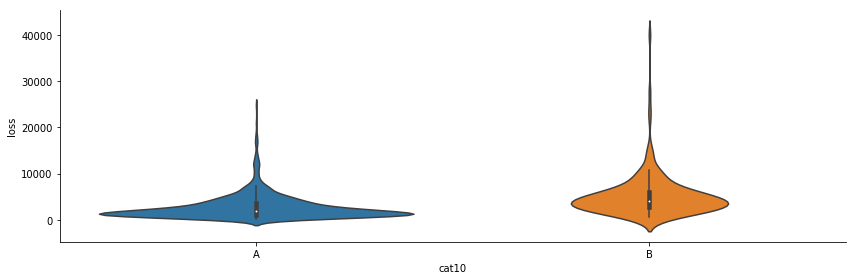

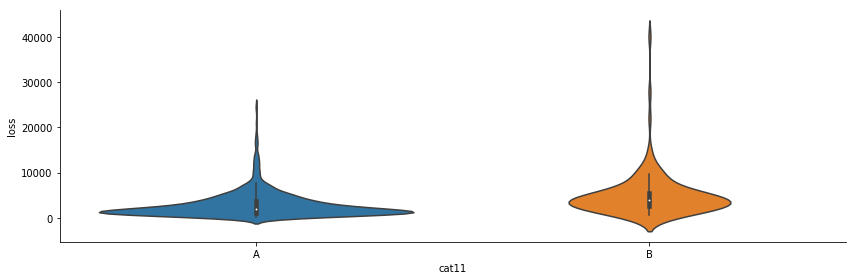

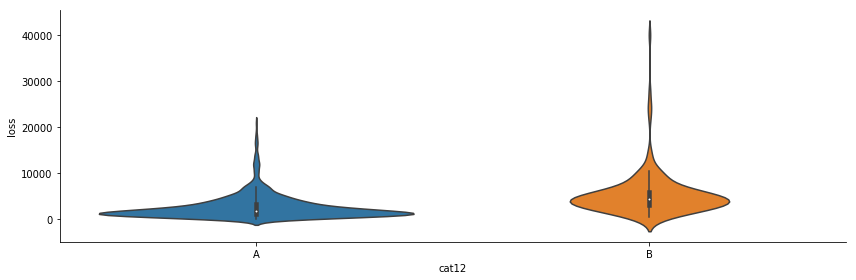

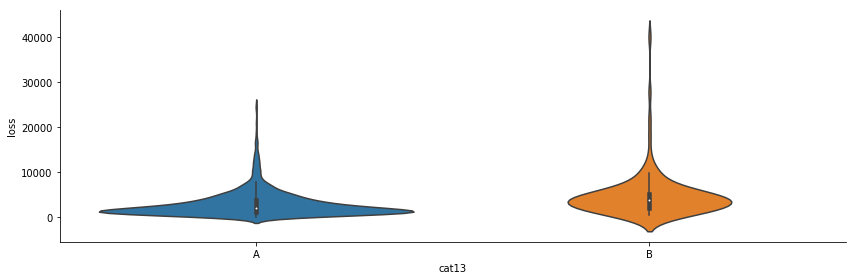

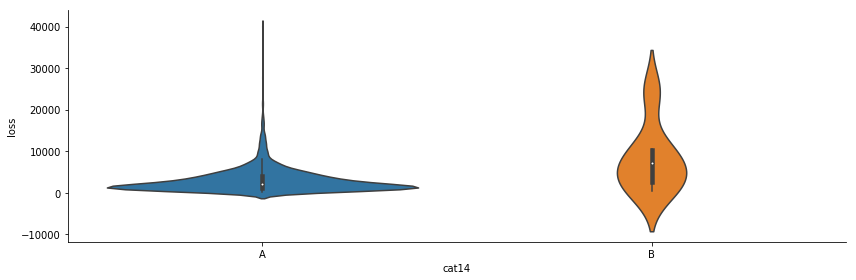

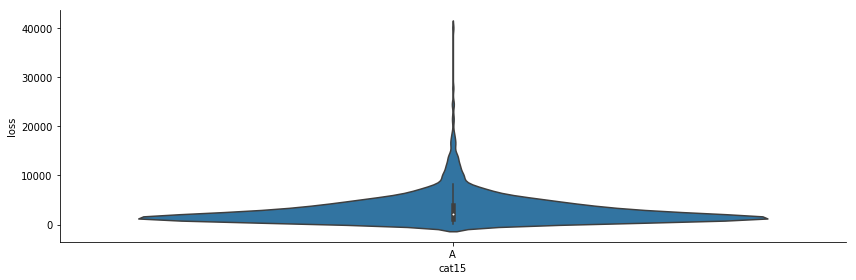

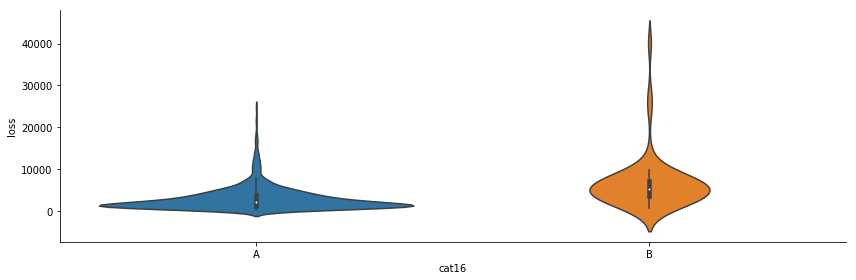

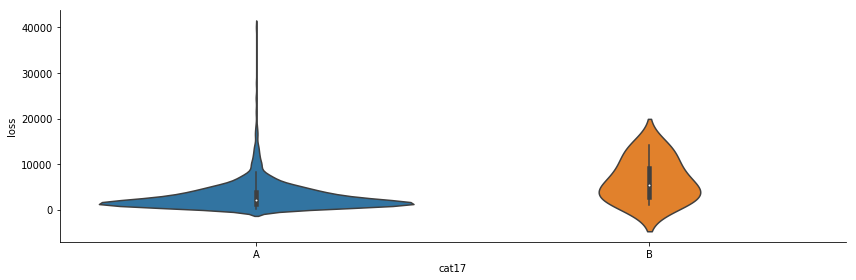

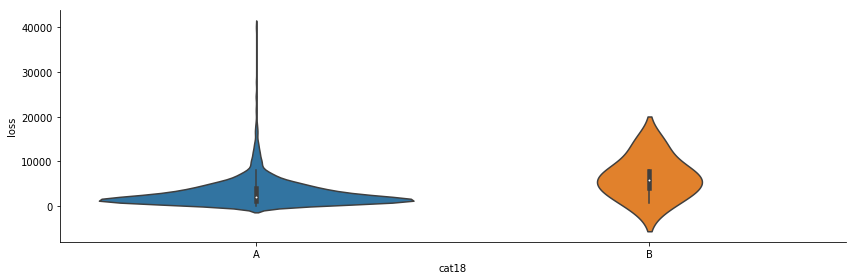

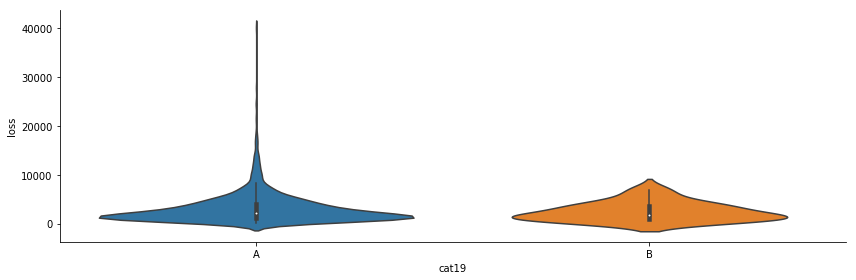

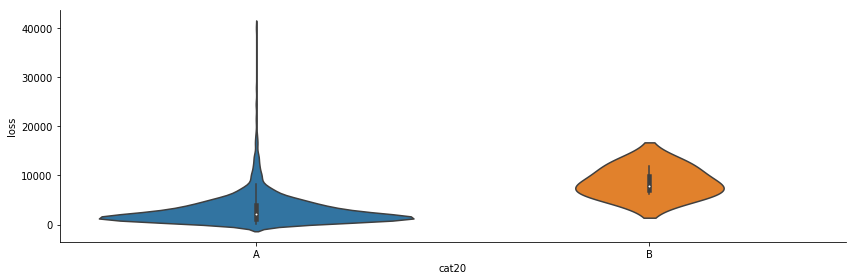

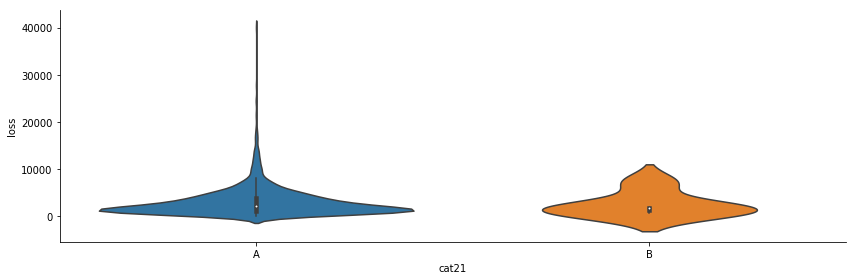

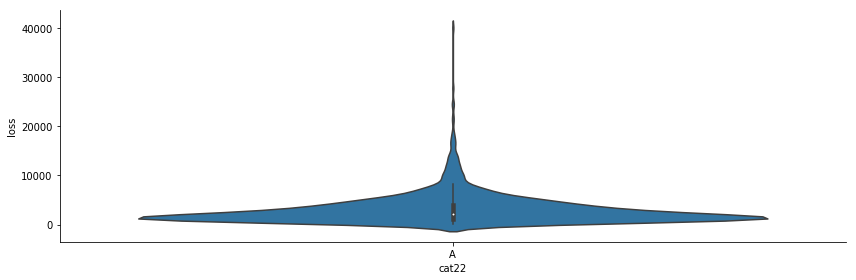

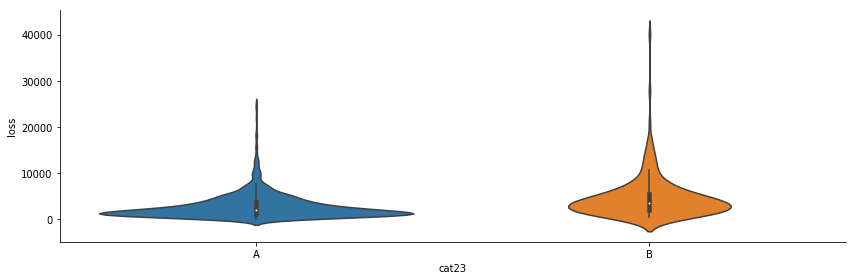

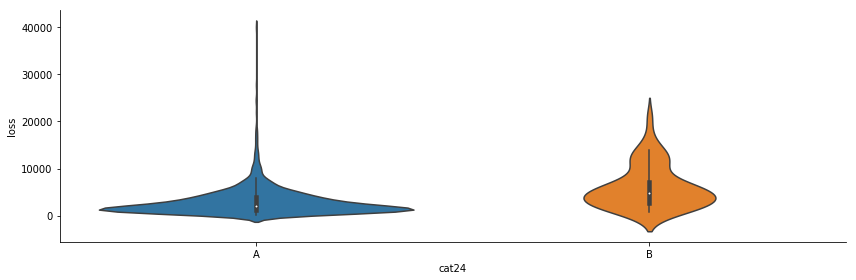

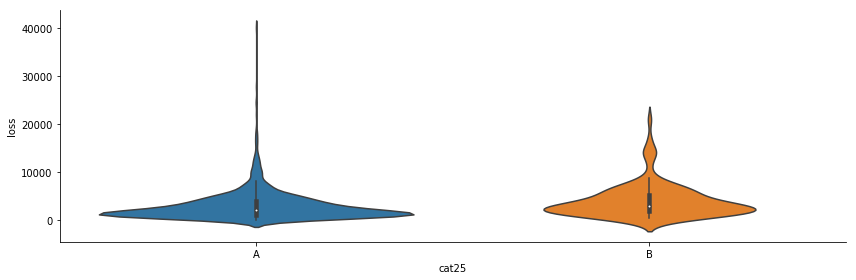

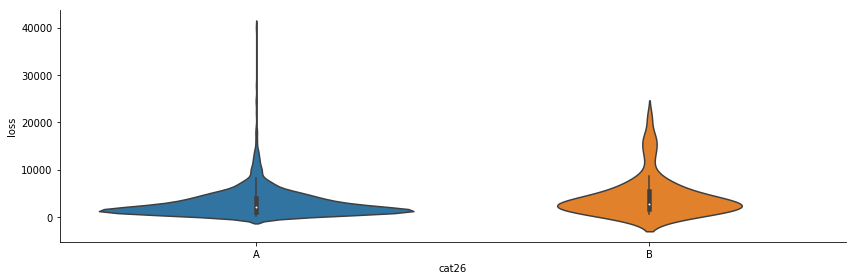

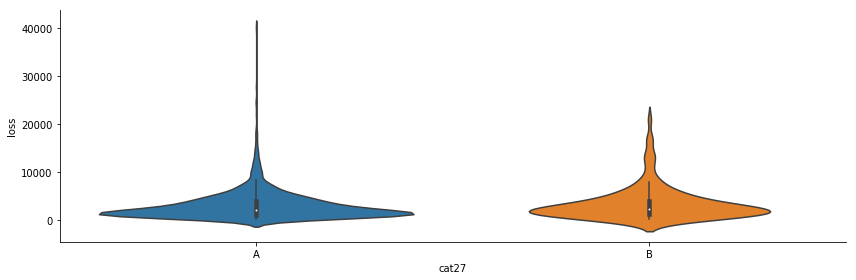

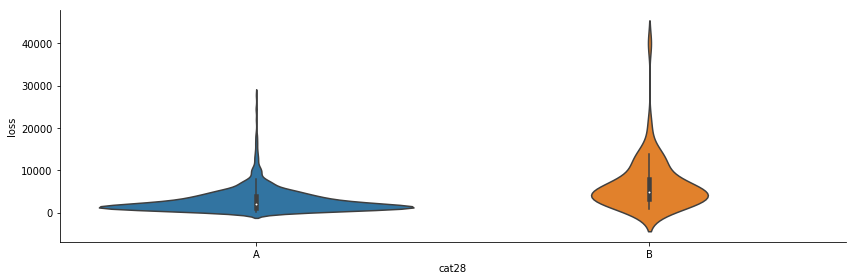

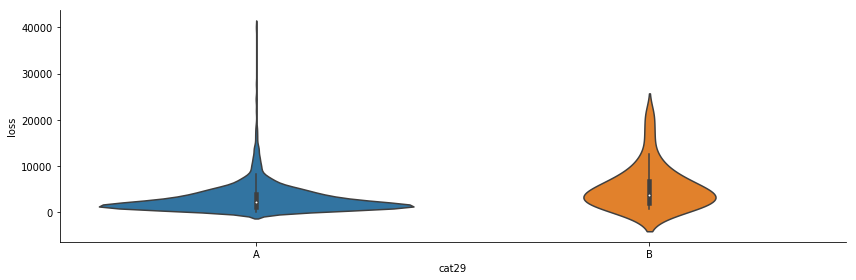

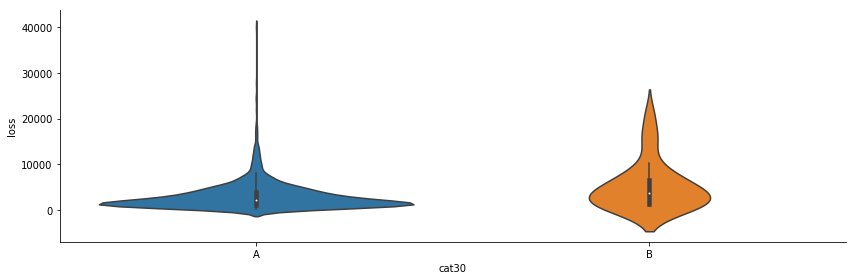

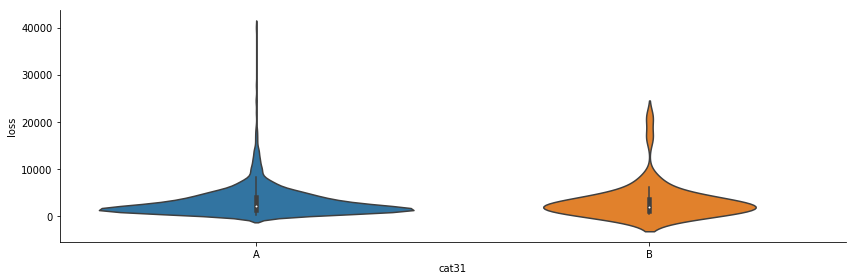

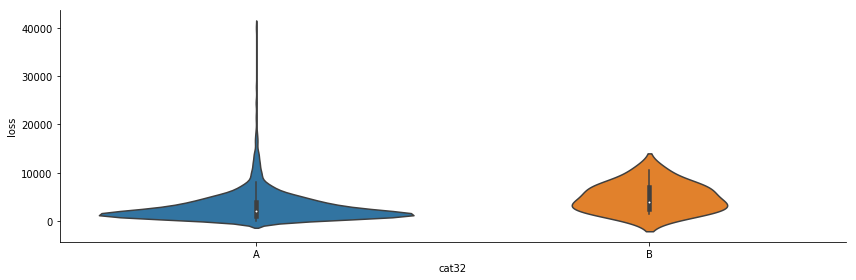

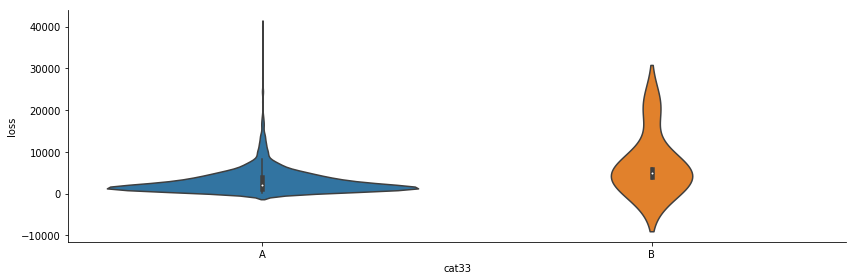

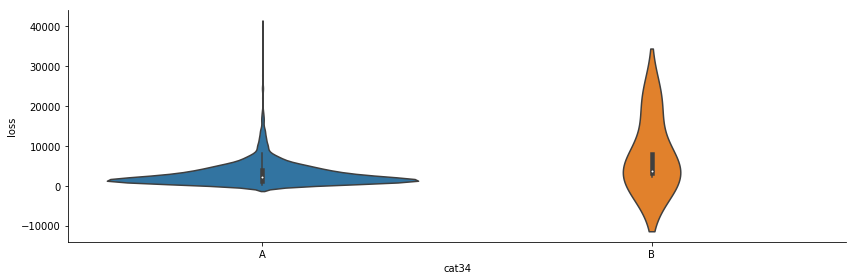

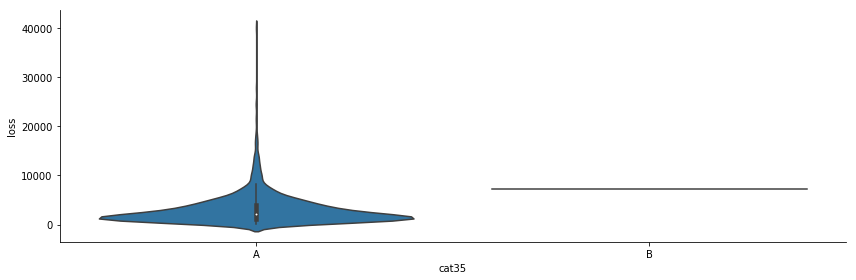

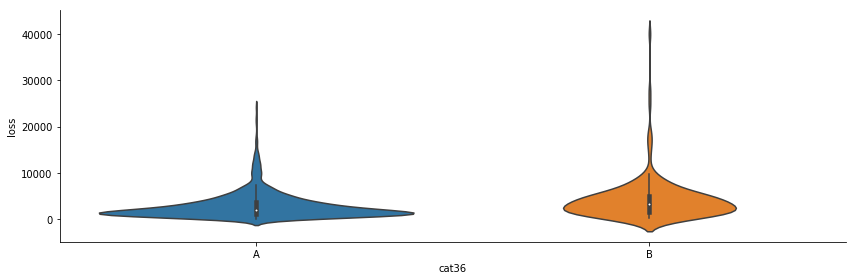

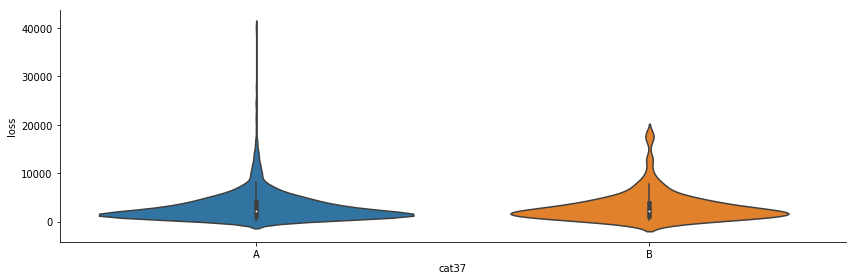

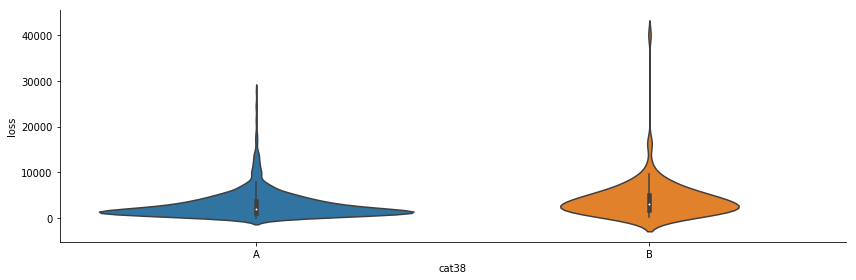

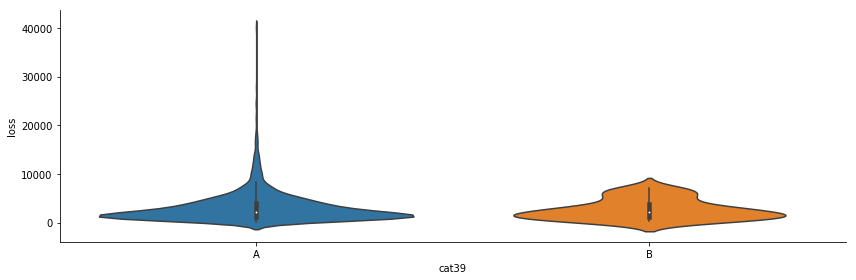

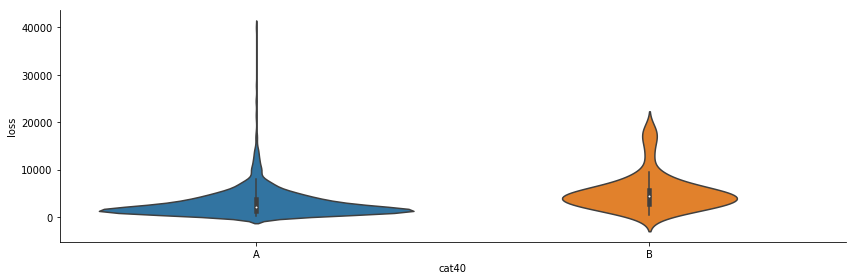

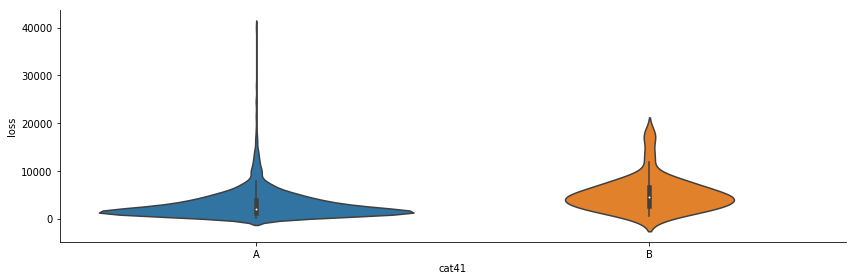

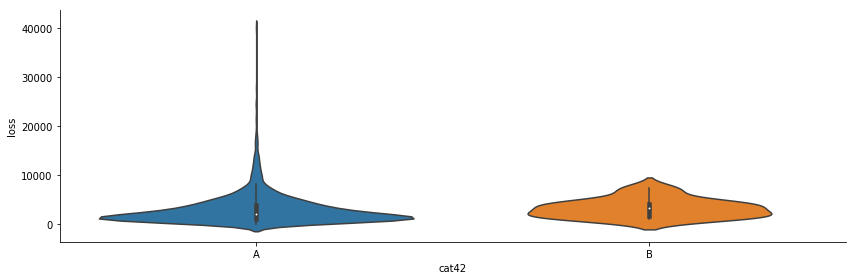

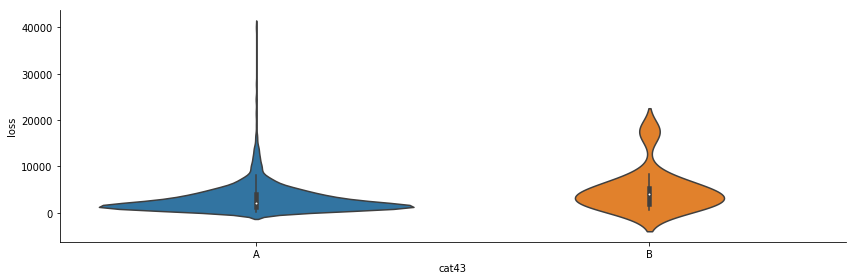

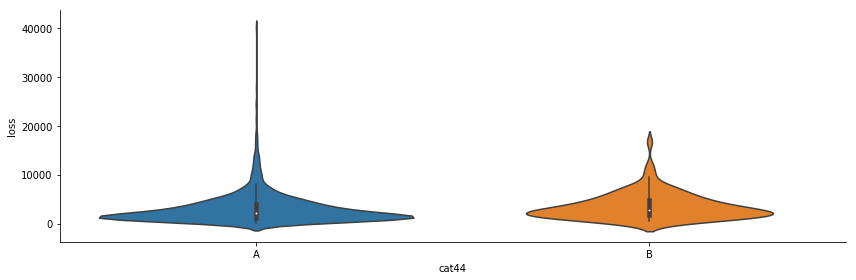

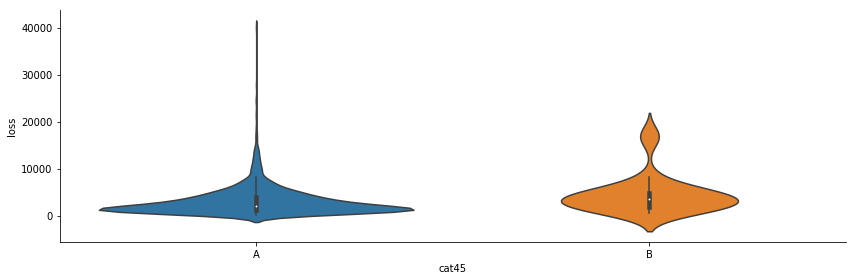

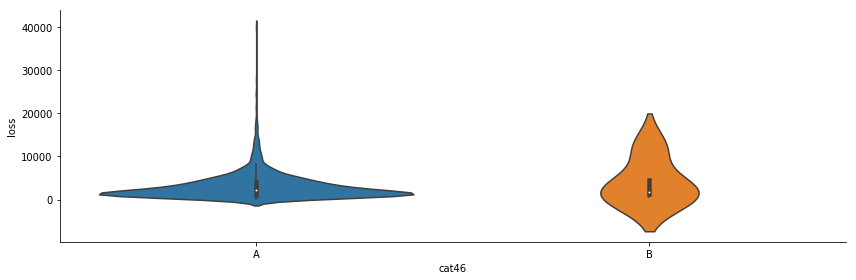

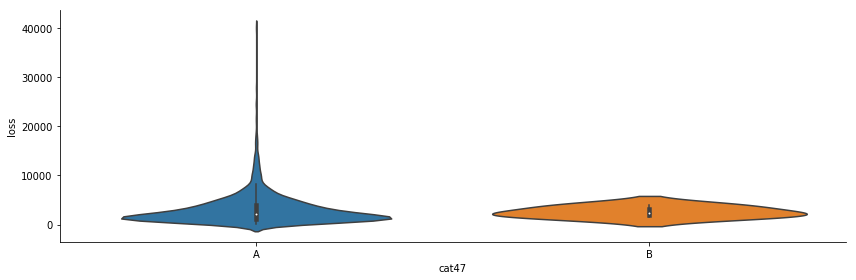

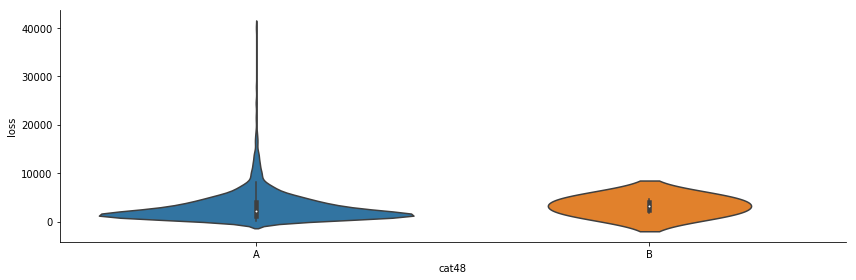

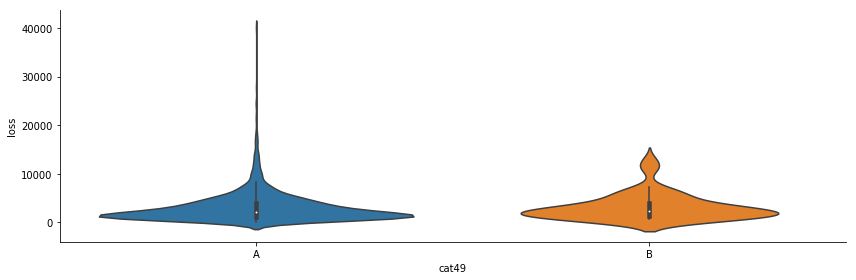

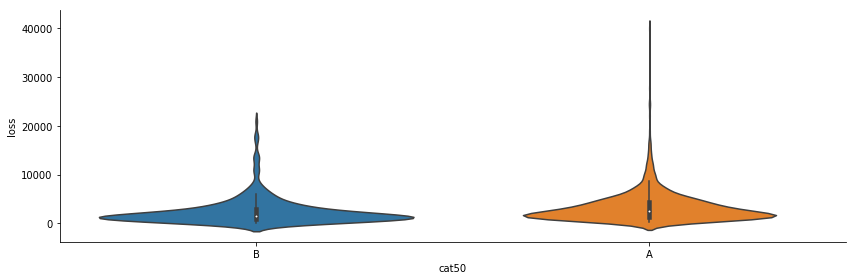

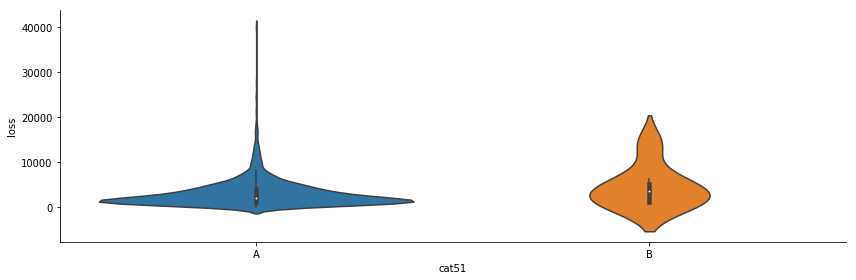

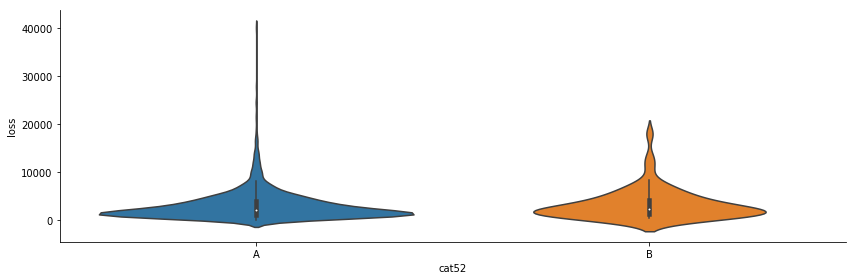

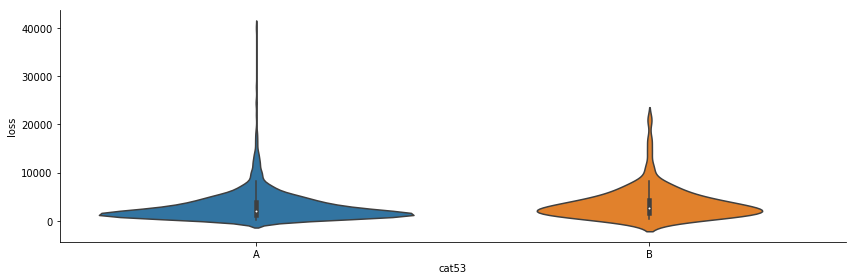

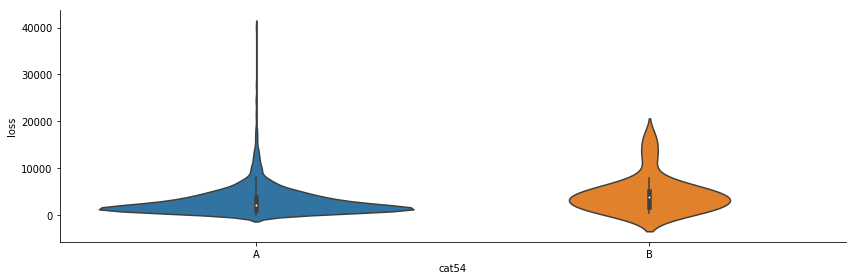

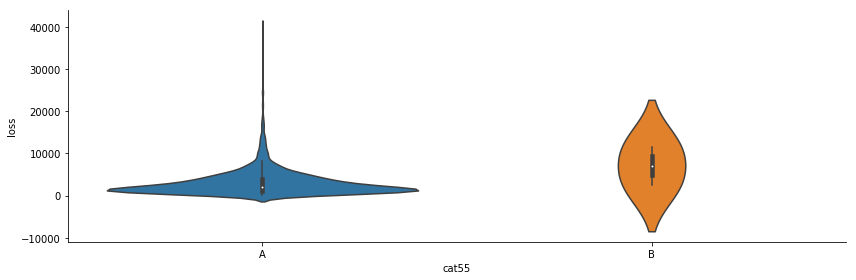

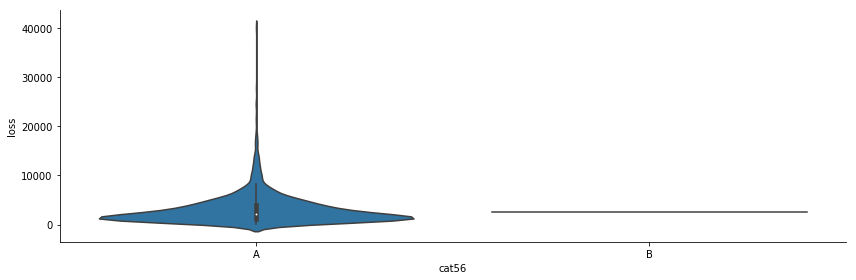

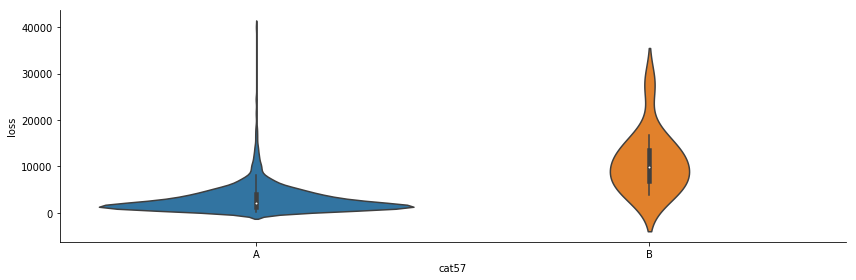

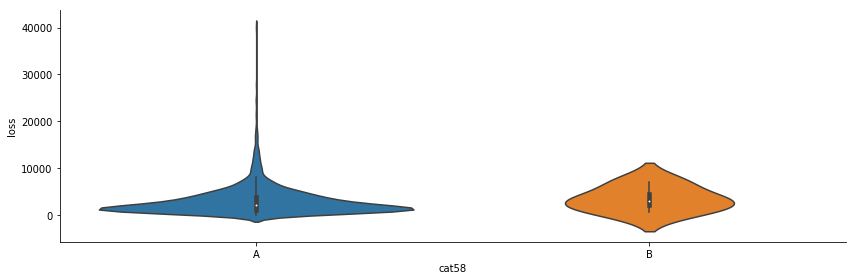

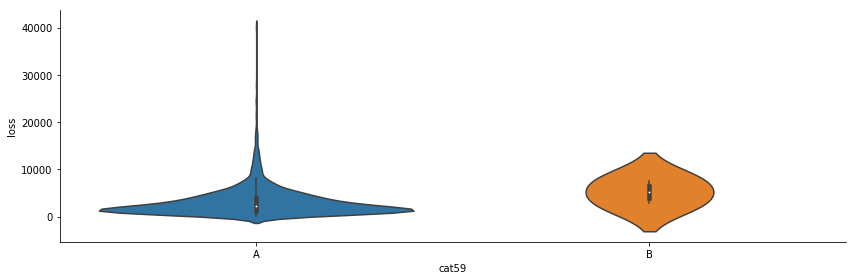

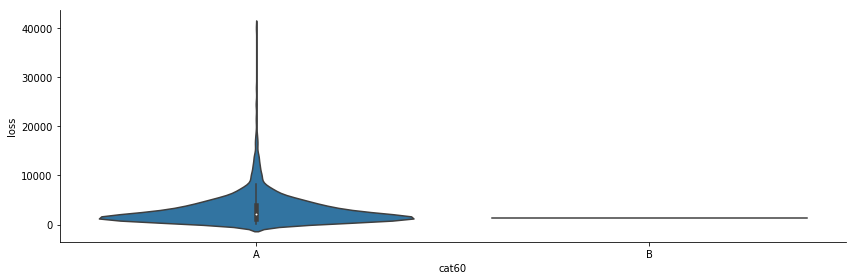

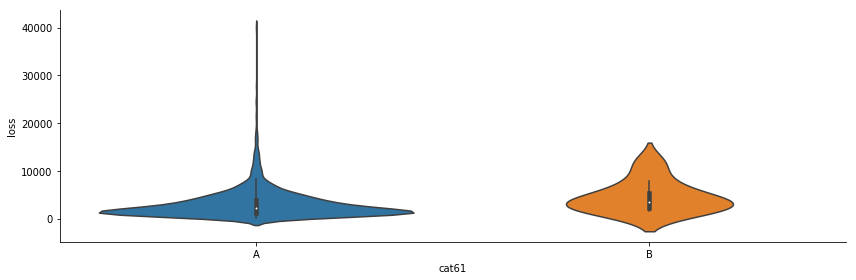

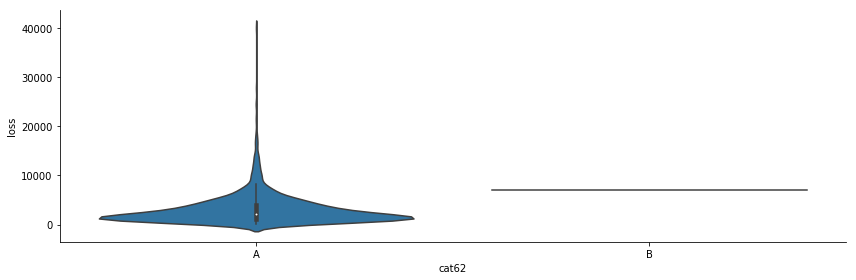

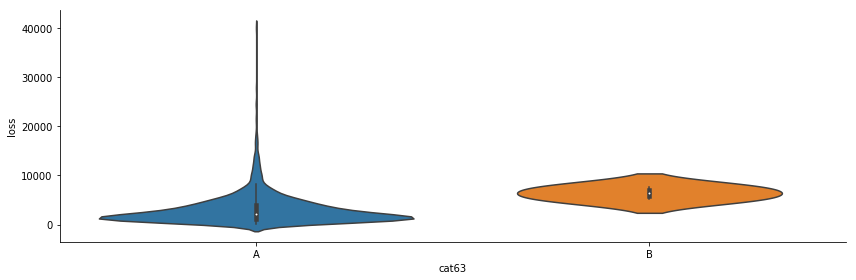

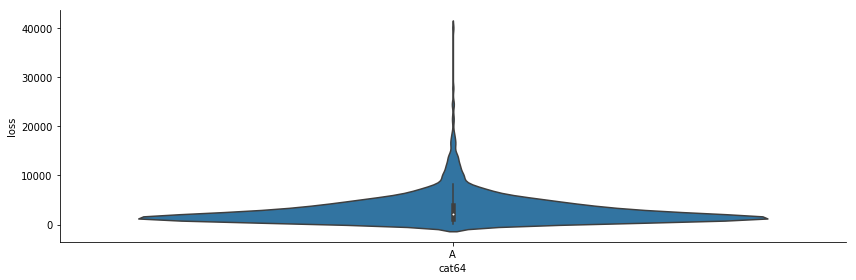

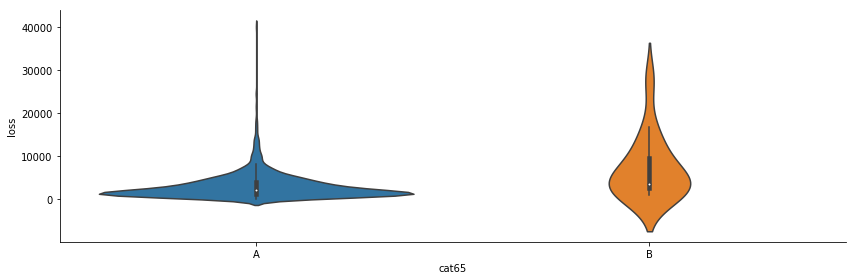

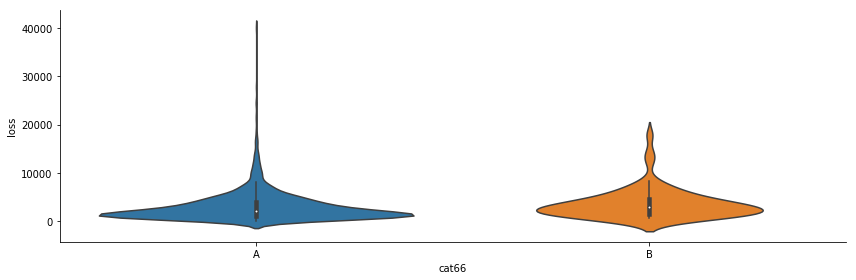

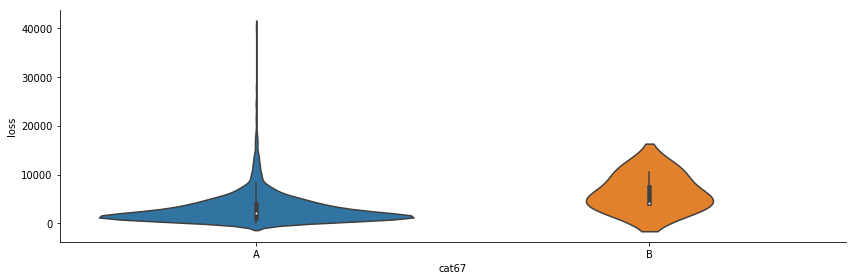

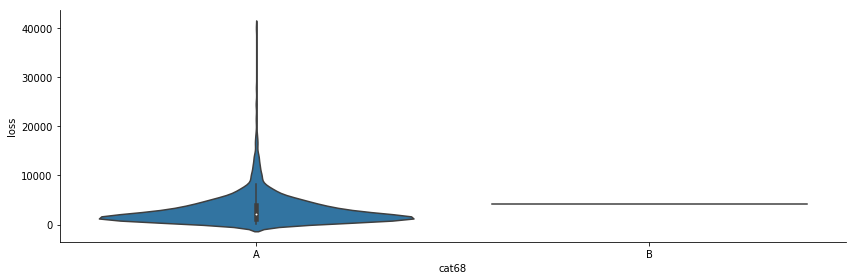

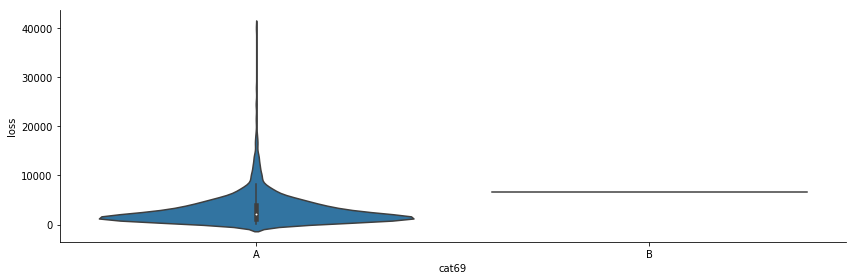

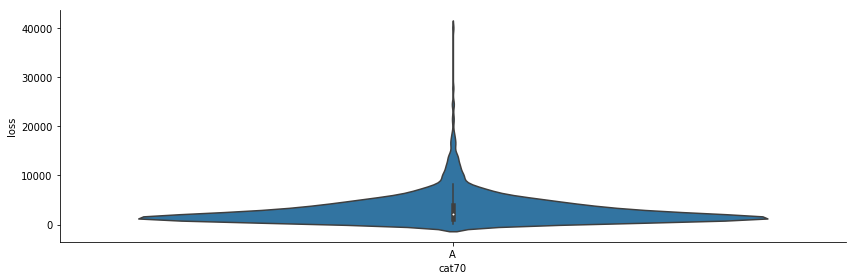

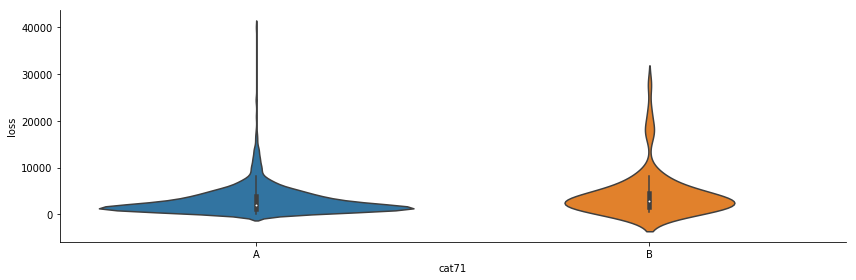

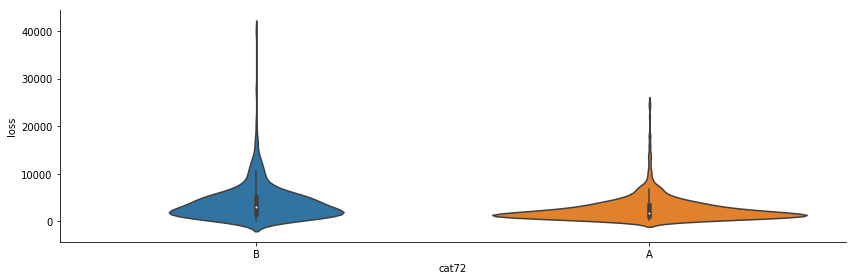

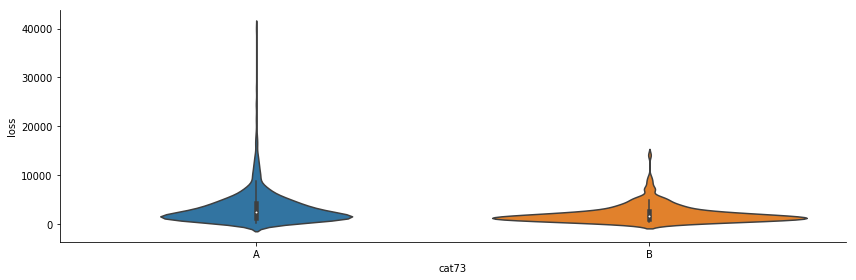

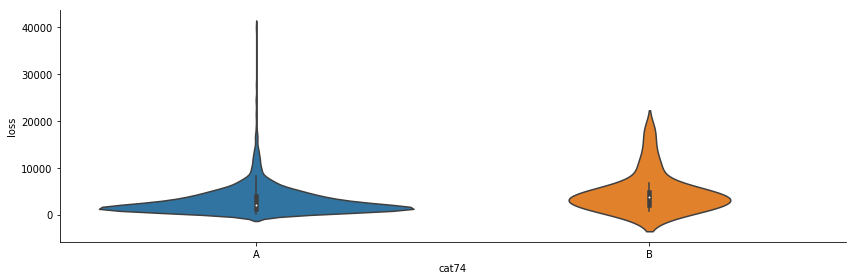

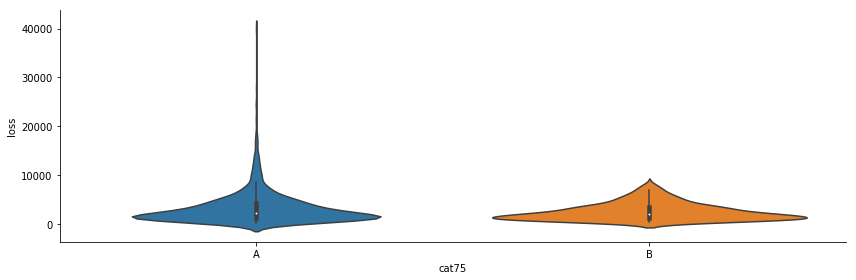

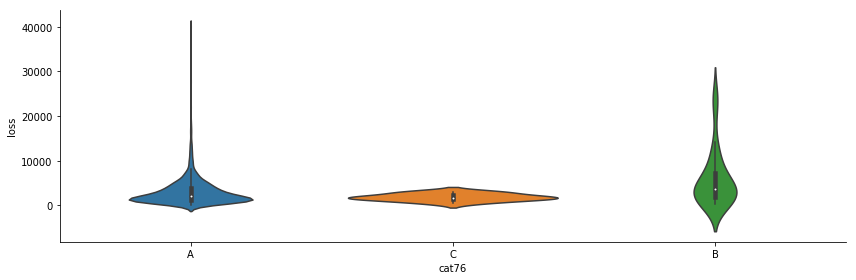

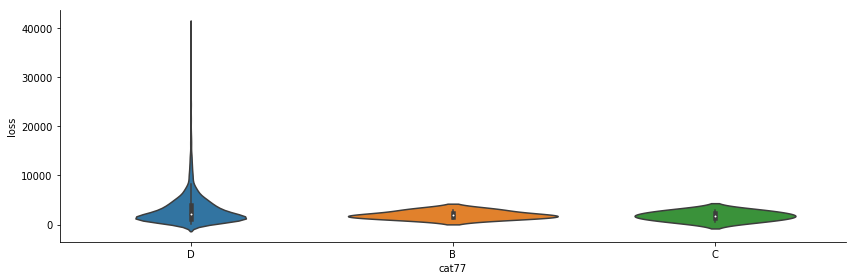

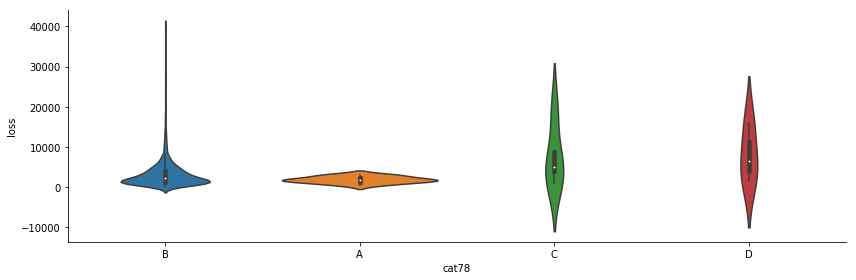

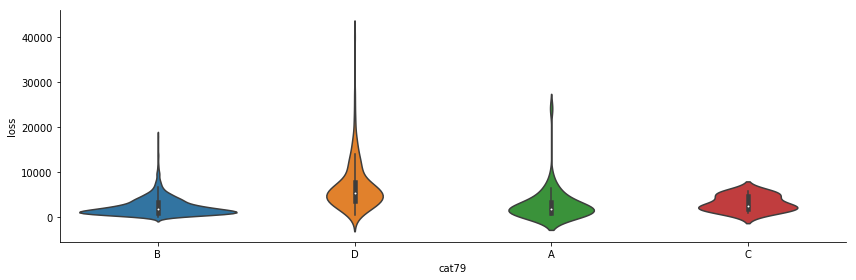

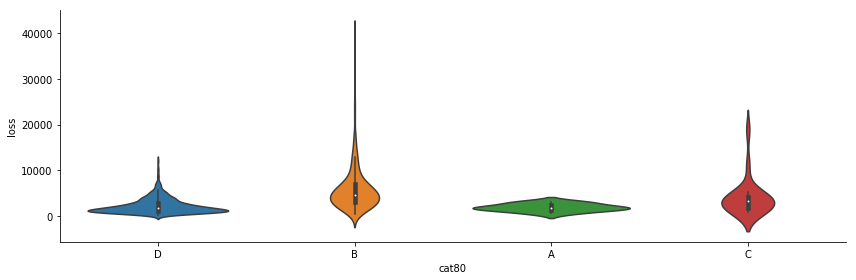

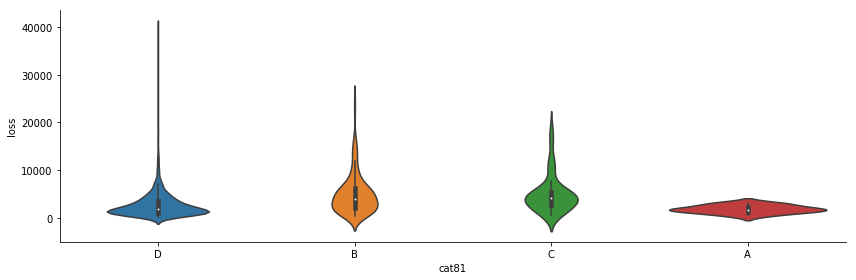

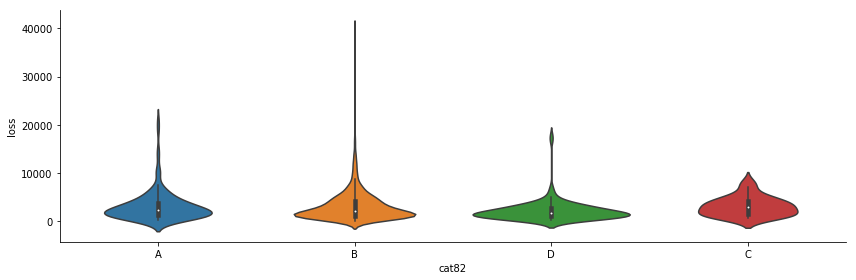

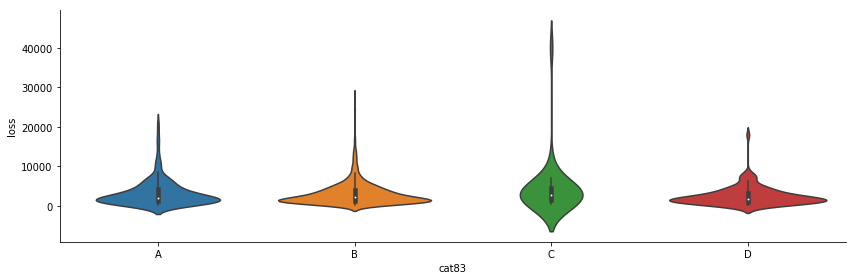

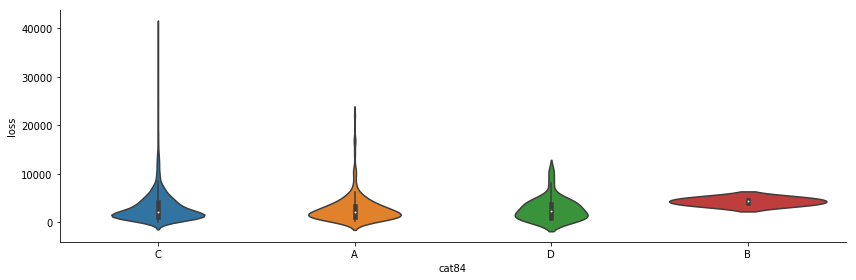

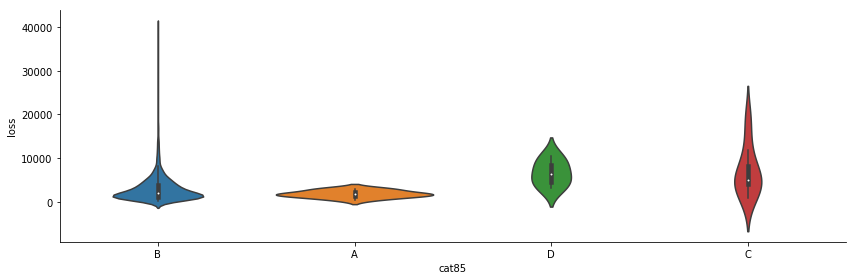

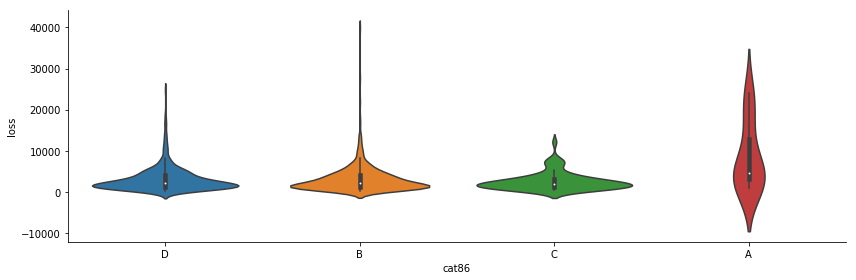

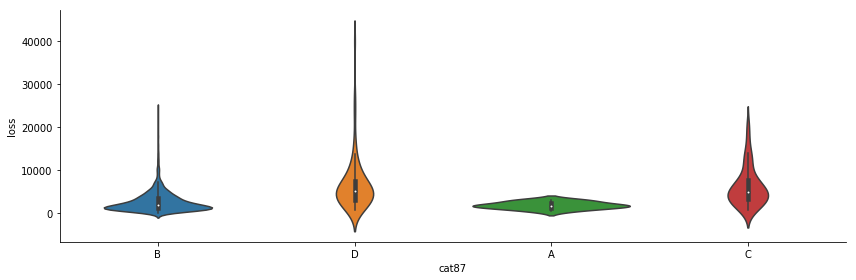

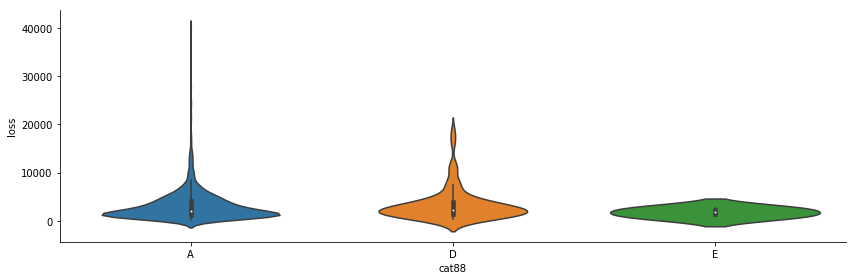

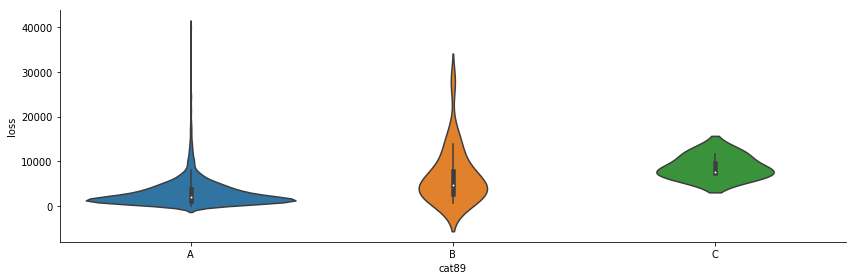

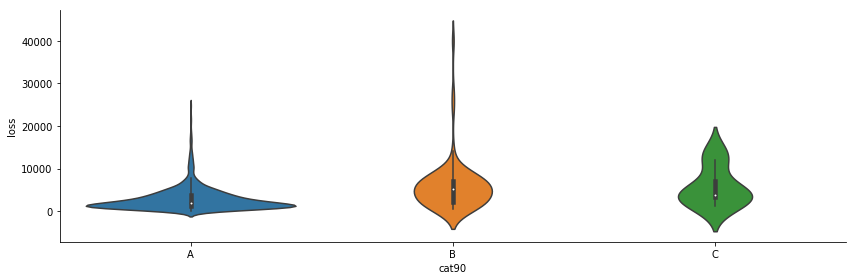

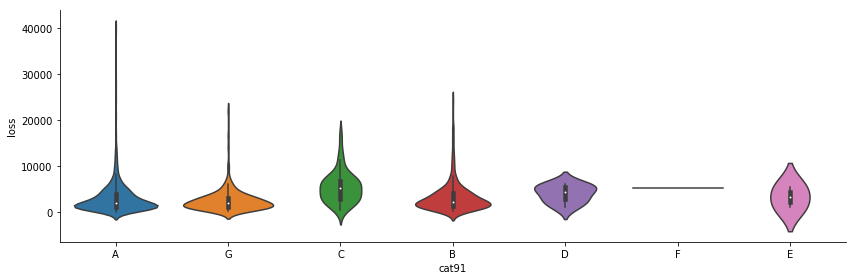

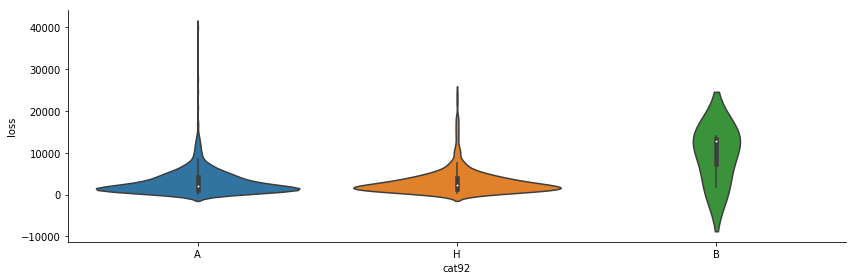

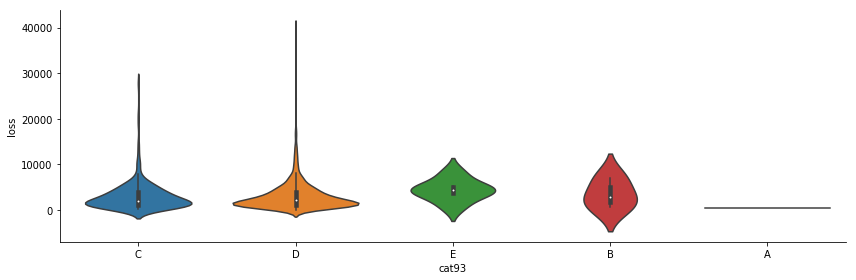

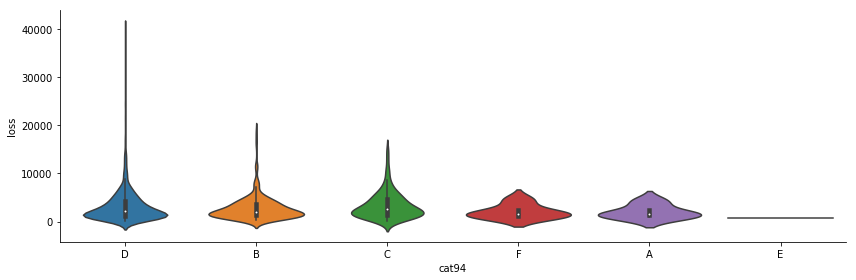

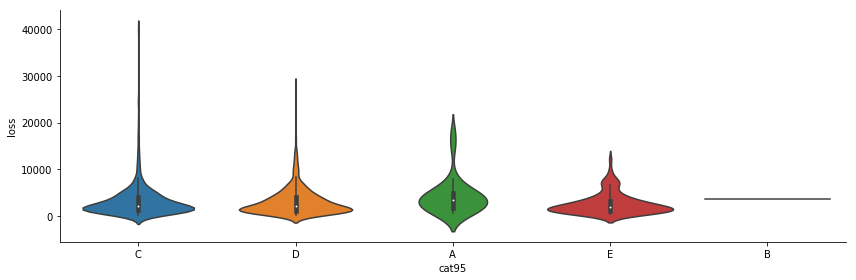

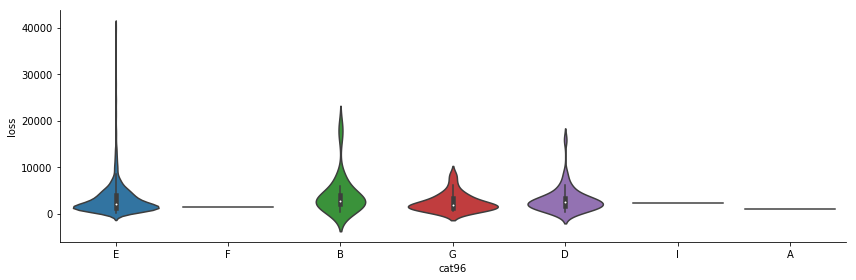

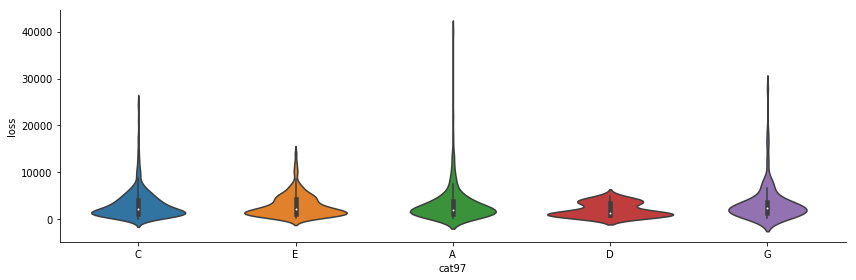

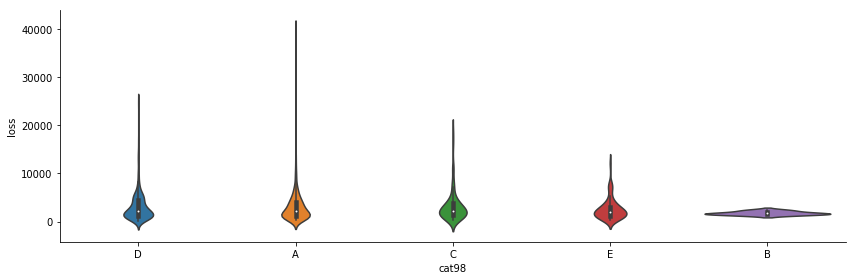

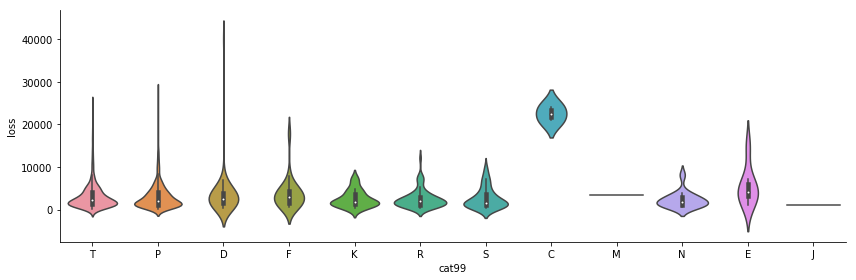

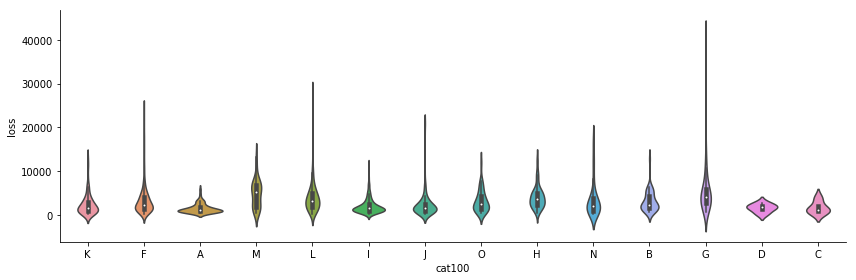

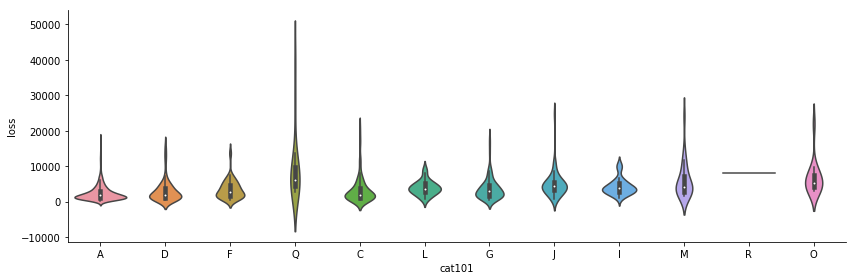

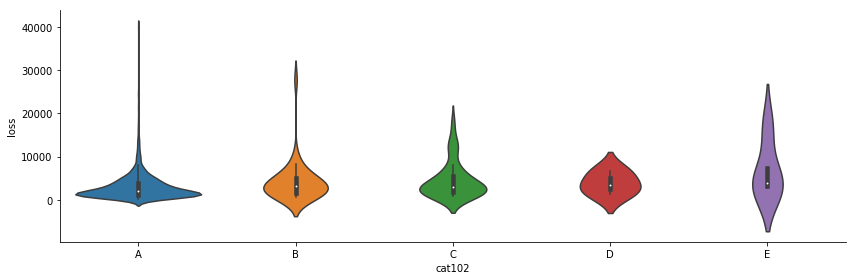

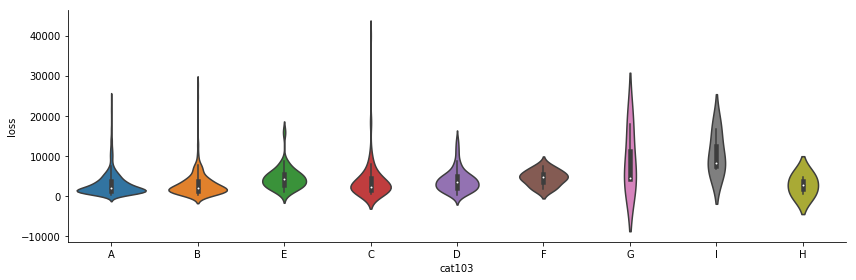

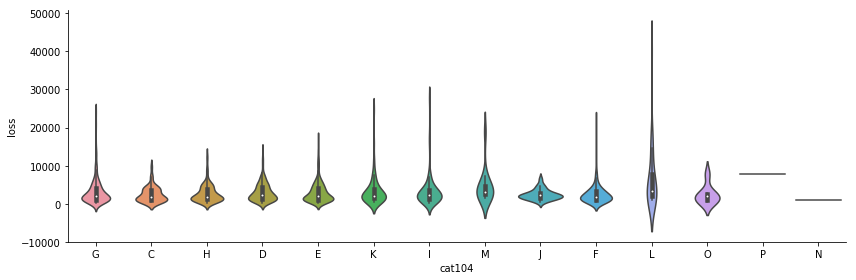

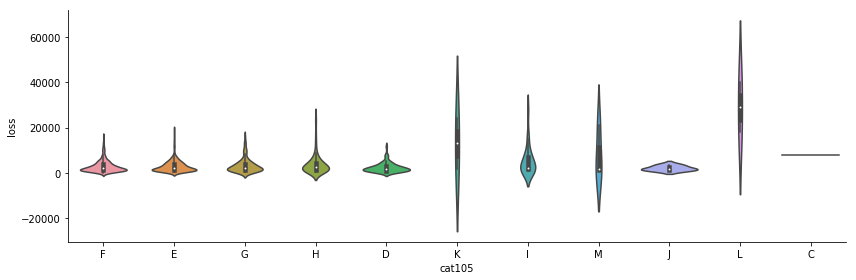

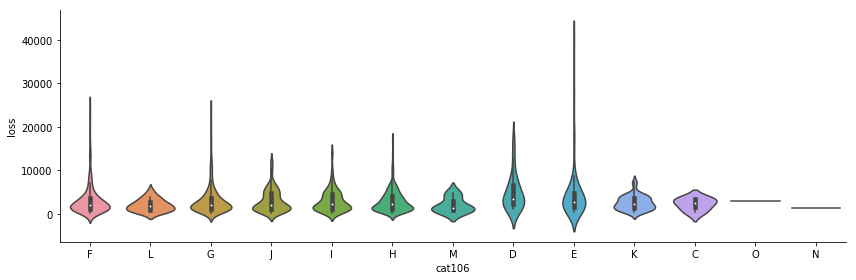

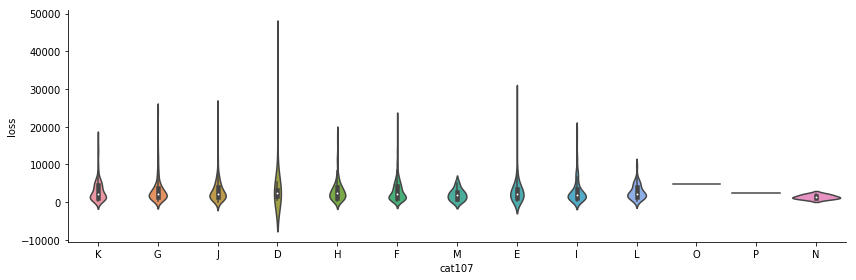

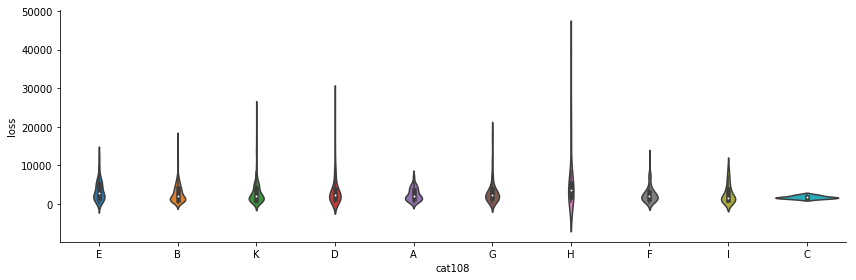

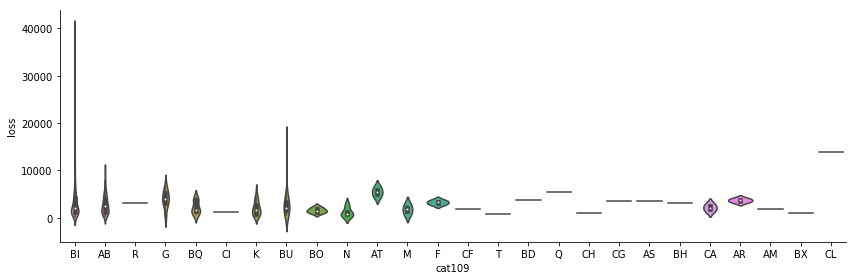

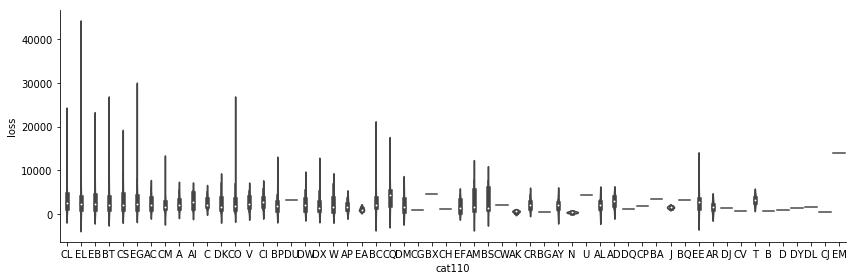

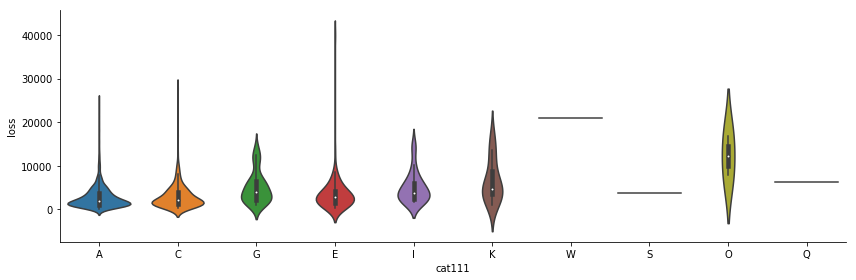

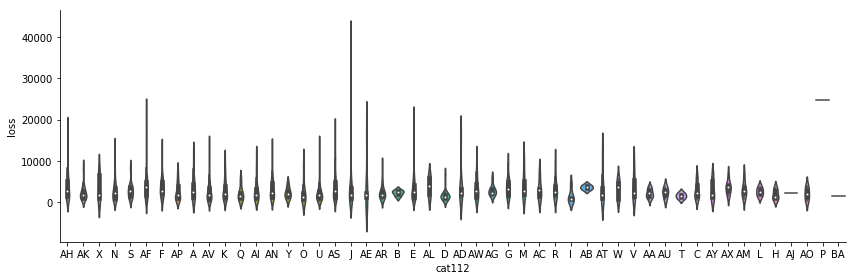

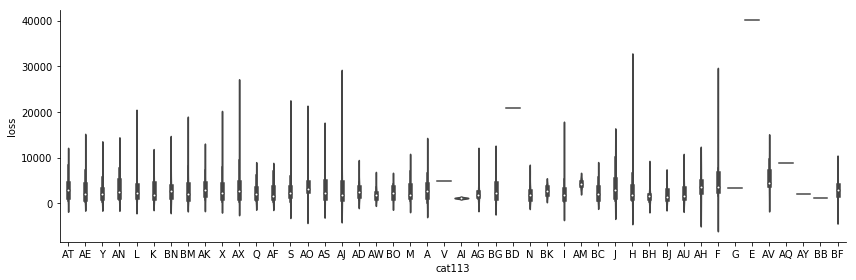

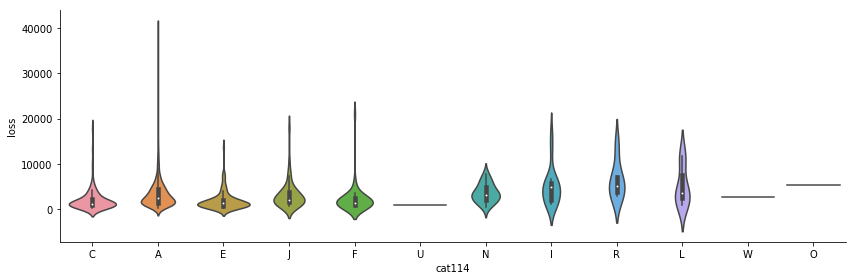

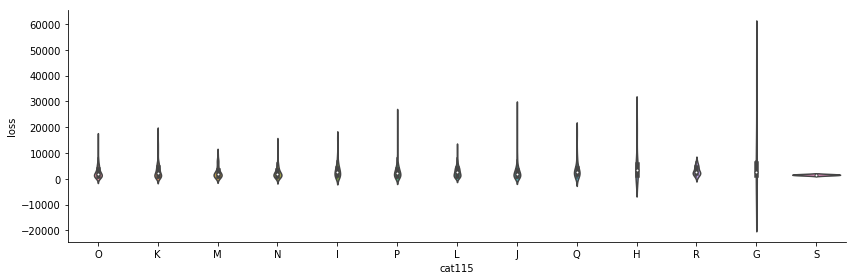

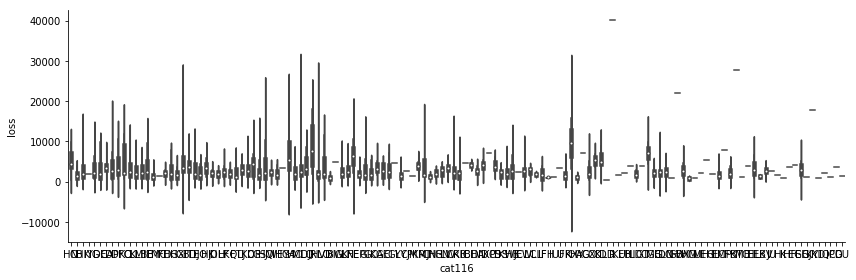

In [111]:
for i in df1.columns[:116]:
    sns.factorplot(i,'loss', data=df1,size=4,aspect=3,kind='violin')

In [71]:
df.loc[df.cat15!='A'].cat15.count()

26

### 1 cats
15 22 35 56 60 62 64 68 69 70
### 3 cats
76 77 88-90 92
### 4 cats
78-87
### 5 cats
93 94
### 6 cats
91
### obvious shape change:
3 7 14 16 17 18 20 21 24 28 29 30 32 33 34 40 41 43 45 46

In [126]:
df.loc[df.cat94=='E'].loss.count()

60